# construct subset of objects

In [1]:
import os
import json

json_path = os.path.join('../../datasets', 'gqa', 'GQA_100', 'fewshot')


In [4]:
# load json

file_path = os.path.join(json_path, 'non_novel', 'non_novel_fewshot.json')
# objects = ('shirt', 'building', 'sign', 'car', 'flower', 'pants', 'helmet', 'pole', 'leaves', 'wall', 'door', 'fence', 'hat', 'shorts')      # fresh
objects = (('plate', 'grass', 'table', 'chair', 'jacket', 'shoe', 'bench'))      # old
new_name = 'nons.json'

info = json.load(open(file_path))


In [5]:

subset = []
for item in info:
    if len(set(item['comb']).difference(objects)) == 0:     # all objects in our desired set
        subset.append(item)

print(len(subset))
print(sorted(list(set([tuple(sorted(item['comb'])) for item in subset]))))

1000
[('bench', 'chair'), ('bench', 'jacket'), ('bench', 'table'), ('chair', 'grass'), ('chair', 'shoe'), ('grass', 'jacket'), ('grass', 'plate'), ('grass', 'shoe'), ('grass', 'table'), ('jacket', 'shoe')]


In [12]:
# save subset

# with open(os.path.join(json_path, new_name), 'w') as f:
#     json.dump(subset, f)

In [7]:
# for sys

file_path = os.path.join(json_path, 'sys', 'sys_fewshot.json')
objects = ('shirt', 'building', 'sign', 'car', 'flower', 'pants', 'helmet', 'pole', 'leaves', 'wall', 'door', 'fence', 'hat', 'shorts')      # fresh
# objects = (('plate', 'grass', 'table', 'chair', 'jacket', 'shoe', 'bench'))      # old
new_name = 'syss.json'

info = json.load(open(file_path))

subset = []
for item in info:
    if len(set(item['comb']).difference(objects)) == 0:     # all objects in our desired set
        subset.append(item)

print(len(subset))
print(sorted(list(set([tuple(sorted(item['comb'])) for item in subset]))))

# # save subset
#
# with open(os.path.join(json_path, new_name), 'w') as f:
#     json.dump(subset, f)

4200
[('building', 'car'), ('building', 'door'), ('building', 'fence'), ('building', 'helmet'), ('building', 'pants'), ('building', 'shirt'), ('building', 'shorts'), ('building', 'wall'), ('car', 'door'), ('car', 'fence'), ('car', 'hat'), ('car', 'pole'), ('car', 'wall'), ('door', 'flower'), ('door', 'hat'), ('door', 'helmet'), ('door', 'pants'), ('door', 'shirt'), ('door', 'shorts'), ('door', 'sign'), ('door', 'wall'), ('fence', 'hat'), ('fence', 'shirt'), ('fence', 'sign'), ('flower', 'hat'), ('flower', 'leaves'), ('flower', 'shorts'), ('flower', 'sign'), ('hat', 'helmet'), ('hat', 'leaves'), ('hat', 'pants'), ('helmet', 'pants'), ('leaves', 'pants'), ('leaves', 'pole'), ('pants', 'pole'), ('pants', 'sign'), ('pole', 'shorts'), ('pole', 'sign'), ('shirt', 'shorts'), ('shirt', 'sign'), ('shorts', 'wall'), ('sign', 'wall')]


# Concept statistics (e.g., in or not in the last train task)

In [1]:
%cd ../..

\\172.18.36.77\datasets\continual-learning-baselines


In [4]:
from datasets.cgqa import continual_training_benchmark
benchmark = continual_training_benchmark(
    n_experiences=10, return_task_id=True,
    seed=1234, shuffle=True,
    dataset_root='../datasets',
    memory_size=0,
)
class_exp = benchmark.original_classes_in_exp
maps = benchmark.label_info[2]
str_class_exp = []
for classes in class_exp:
    str_class_exp.append([maps[c] for c in classes])
print(str_class_exp)

[[('fence', 'flower'), ('door', 'grass'), ('leaves', 'shirt'), ('grass', 'table'), ('shoe', 'shorts'), ('hat', 'table'), ('leaves', 'wall'), ('chair', 'grass'), ('door', 'shoe'), ('fence', 'helmet')], [('chair', 'sign'), ('grass', 'shorts'), ('hat', 'plate'), ('pole', 'shirt'), ('grass', 'pants'), ('pants', 'shoe'), ('pole', 'wall'), ('bench', 'chair'), ('helmet', 'plate'), ('leaves', 'shoe')], [('bench', 'shorts'), ('flower', 'pole'), ('chair', 'helmet'), ('pants', 'shorts'), ('helmet', 'shorts'), ('helmet', 'shoe'), ('hat', 'jacket'), ('hat', 'shorts'), ('jacket', 'shoe'), ('fence', 'wall')], [('bench', 'helmet'), ('hat', 'shirt'), ('bench', 'sign'), ('plate', 'wall'), ('grass', 'plate'), ('helmet', 'pole'), ('door', 'leaves'), ('bench', 'pants'), ('grass', 'jacket'), ('jacket', 'pole')], [('car', 'jacket'), ('building', 'plate'), ('helmet', 'leaves'), ('pants', 'shirt'), ('car', 'leaves'), ('bench', 'leaves'), ('fence', 'pants'), ('bench', 'shirt'), ('fence', 'grass'), ('building', 

In [2]:
from datasets.cobj import continual_training_benchmark
benchmark = continual_training_benchmark(
    n_experiences=10, return_task_id=True,
    seed=1234, shuffle=True,
    dataset_root='../datasets',
    memory_size=0,
)
class_exp = benchmark.original_classes_in_exp
maps = benchmark.label_info[2]
str_class_exp = []
for classes in class_exp:
    str_class_exp.append([maps[c] for c in classes])
print(str_class_exp)

[[('Bracelet', 'Person'), ('Lamp', 'Person')], [('Boat', 'Sailboat'), ('Other Shoes', 'Person')], [('Microphone', 'Person'), ('Car', 'SUV')], [('Car', 'Person'), ('Bench', 'Person')], [('Flag', 'Person'), ('Person', 'Street Lights')], [('Person', 'Sneakers'), ('Handbag/Satchel', 'Person')], [('Glasses', 'Person'), ('Flower', 'Vase')], [('Chair', 'Person'), ('Boat', 'Person')], [('Person', 'Tie'), ('Hat', 'Person')], [('Chair', 'Desk'), ('Necklace', 'Person')]]


In [3]:
# concepts in each task
str_concept_exp = []
for task_id in range(10):
    concepts = sorted(set([concept for concept_tuple in str_class_exp[task_id] for concept in concept_tuple]))
    str_concept_exp.append(concepts)
    print(f'{task_id} concepts: {concepts}.')

0 concepts: ['Bracelet', 'Lamp', 'Person'].
1 concepts: ['Boat', 'Other Shoes', 'Person', 'Sailboat'].
2 concepts: ['Car', 'Microphone', 'Person', 'SUV'].
3 concepts: ['Bench', 'Car', 'Person'].
4 concepts: ['Flag', 'Person', 'Street Lights'].
5 concepts: ['Handbag/Satchel', 'Person', 'Sneakers'].
6 concepts: ['Flower', 'Glasses', 'Person', 'Vase'].
7 concepts: ['Boat', 'Chair', 'Person'].
8 concepts: ['Hat', 'Person', 'Tie'].
9 concepts: ['Chair', 'Desk', 'Necklace', 'Person'].


\begin{tabular}{lrrrrrrrrrr}
{Task j} & {0} & {1} & {2} & {3} & {4} & {5} & {6} & {7} & {8} & {9} \\
{Task i} & {} & {} & {} & {} & {} & {} & {} & {} & {} & {} \\
0 & 3 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
1 & 1 & 4 & 1 & 1 & 1 & 1 & 1 & 2 & 1 & 1 \\
2 & 1 & 1 & 4 & 2 & 1 & 1 & 1 & 1 & 1 & 1 \\
3 & 1 & 1 & 2 & 3 & 1 & 1 & 1 & 1 & 1 & 1 \\
4 & 1 & 1 & 1 & 1 & 3 & 1 & 1 & 1 & 1 & 1 \\
5 & 1 & 1 & 1 & 1 & 1 & 3 & 1 & 1 & 1 & 1 \\
6 & 1 & 1 & 1 & 1 & 1 & 1 & 4 & 1 & 1 & 1 \\
7 & 1 & 2 & 1 & 1 & 1 & 1 & 1 & 3 & 1 & 2 \\
8 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 3 & 1 \\
9 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 2 & 1 & 4 \\
\end{tabular}

Task j  0  1  2  3  4  5  6  7  8  9
Task i                              
0       3  1  1  1  1  1  1  1  1  1
1       1  4  1  1  1  1  1  2  1  1
2       1  1  4  2  1  1  1  1  1  1
3       1  1  2  3  1  1  1  1  1  1
4       1  1  1  1  3  1  1  1  1  1
5       1  1  1  1  1  3  1  1  1  1
6       1  1  1  1  1  1  4  1  1  1
7       1  2  1  1  1  1  1  3  1  2
8 

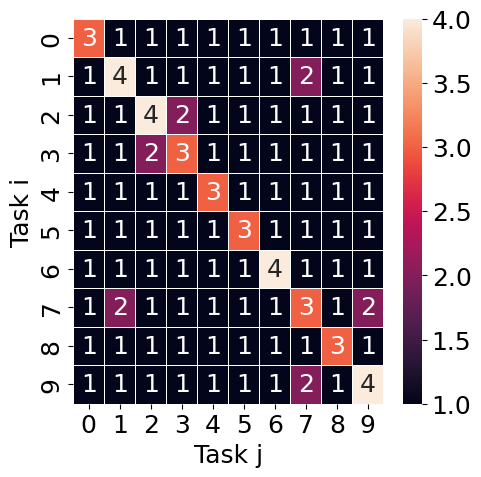

In [4]:
# num of same concepts: pair-wisely compare
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

collected_data = []
for xid, concept_x in enumerate(str_concept_exp):
    for yid, concept_y in enumerate(str_concept_exp):
        num_same_concepts = len(set(concept_x) & set(concept_y))
        collected_data.append(pd.DataFrame({'Task i': xid, 'Task j': yid, 'Num': num_same_concepts}, index=[0]))
collected_data = pd.concat(collected_data, ignore_index=True)
data = collected_data.pivot(index='Task i', columns='Task j', values='Num')
plt.figure(figsize=(5, 5))
matplotlib.rcParams.update({'font.size': 18})
ax = sns.heatmap(data, annot=True, linewidth=.5)
fig = ax.get_figure()
fig.savefig(os.path.join('D:', 'Downloads', 'fig.png'), dpi = 400, bbox_inches='tight')
print(data.style.to_latex())
print(data)


In [12]:
set(str_concept_exp[0]) & set(str_concept_exp[4])

{'fence', 'grass', 'helmet', 'leaves', 'shirt'}

In [3]:
fresh_concepts = sorted(set([concept for concept_tuple in str_class_exp[-1] for concept in concept_tuple]))
old_concepts = sorted(set([concept for concept_tuple in benchmark.label_info[0] for concept in concept_tuple]) - set(fresh_concepts))
print(f'fresh_concepts: {fresh_concepts}.')
print(f'old_concepts: {old_concepts}.')

fresh_concepts: ['building', 'car', 'door', 'fence', 'flower', 'hat', 'helmet', 'leaves', 'pants', 'pole', 'shirt', 'shorts', 'sign', 'wall'].
old_concepts: ['bench', 'chair', 'grass', 'jacket', 'plate', 'shoe', 'table'].


In [4]:
from datasets.cgqa import fewshot_testing_benchmark

benchmark_non = fewshot_testing_benchmark(
    n_experiences=300, mode='non', n_way=10, n_shot=10, n_val=5, n_query=10, task_offset=1, seed=1234, dataset_root='../datasets')
# non(f)
nonf = []
for concept_tuple in benchmark_non.label_info[0]:
    is_target = True
    for concept in concept_tuple:
        if concept not in fresh_concepts:
            is_target = False
    if is_target:
        nonf.append(concept_tuple)
nonf = sorted(nonf)
print(f'nonf: {nonf}')
# non(o)
nono = []
for concept_tuple in benchmark_non.label_info[0]:
    is_target = True
    for concept in concept_tuple:
        if concept not in old_concepts:
            is_target = False
    if is_target:
        nono.append(concept_tuple)
nono = sorted(nono)
print(f'nono: {nono}')

benchmark_non = fewshot_testing_benchmark(
    n_experiences=300, mode='sys', n_way=10, n_shot=10, n_val=5, n_query=10, task_offset=1, seed=1234, dataset_root='../datasets')
# sys(f)
sysf = []
for concept_tuple in benchmark_non.label_info[0]:
    is_target = True
    for concept in concept_tuple:
        if concept not in fresh_concepts:
            is_target = False
    if is_target:
        sysf.append(concept_tuple)
sysf = sorted(sysf)
print(f'sysf: {sysf}')
# sys(o)
syso = []
for concept_tuple in benchmark_non.label_info[0]:
    is_target = True
    for concept in concept_tuple:
        if concept not in old_concepts:
            is_target = False
    if is_target:
        syso.append(concept_tuple)
syso = sorted(syso)
print(f'syso: {syso}')

nonf: [('building', 'hat'), ('building', 'leaves'), ('car', 'flower'), ('car', 'helmet'), ('car', 'leaves'), ('car', 'pants'), ('car', 'shirt'), ('car', 'shorts'), ('car', 'sign'), ('door', 'fence'), ('door', 'leaves'), ('door', 'pole'), ('fence', 'flower'), ('fence', 'helmet'), ('fence', 'leaves'), ('fence', 'pants'), ('fence', 'pole'), ('fence', 'shorts'), ('fence', 'wall'), ('flower', 'helmet'), ('flower', 'pants'), ('flower', 'pole'), ('flower', 'shirt'), ('flower', 'wall'), ('hat', 'shirt'), ('hat', 'shorts'), ('hat', 'sign'), ('hat', 'wall'), ('helmet', 'leaves'), ('helmet', 'pole'), ('helmet', 'shirt'), ('helmet', 'shorts'), ('helmet', 'sign'), ('leaves', 'shirt'), ('leaves', 'shorts'), ('leaves', 'sign'), ('leaves', 'wall'), ('pants', 'shirt'), ('pants', 'shorts'), ('pants', 'wall'), ('pole', 'shirt'), ('pole', 'wall'), ('shirt', 'wall')]
nono: [('bench', 'chair'), ('bench', 'jacket'), ('bench', 'table'), ('chair', 'grass'), ('chair', 'shoe'), ('grass', 'jacket'), ('grass', 'pl

In [5]:
'''Generate fixed_class_order for 4 subset'''
import numpy as np
from datasets.cgqa import fewshot_testing_benchmark

# nonf
benchmark_non = fewshot_testing_benchmark(
    n_experiences=300, mode='non', n_way=10, n_shot=10, n_val=5, n_query=10, task_offset=1, seed=1234, dataset_root='../datasets')

maps = benchmark_non.label_info[1]      # from str to int
nonf_int = [maps[c] for c in nonf]
n_experiences = 300
selected_classes_in_exp = []
rng = np.random.RandomState(seed=1234)
for exp_idx in range(n_experiences):
    '''select n_way classes for each exp'''
    selected_class_idxs = list(rng.choice(nonf_int, 2, replace=False))   # 2-way
    selected_classes_in_exp.extend(selected_class_idxs)

print(f'nonf: {selected_classes_in_exp}')

# nono
nono_int = [maps[c] for c in nono]
n_experiences = 300
selected_classes_in_exp = []
rng = np.random.RandomState(seed=1234)
for exp_idx in range(n_experiences):
    '''select n_way classes for each exp'''
    selected_class_idxs = list(rng.choice(nono_int, 2, replace=False))   # 2-way
    selected_classes_in_exp.extend(selected_class_idxs)

print(f'nono: {selected_classes_in_exp}')

# sysf
benchmark_sys = fewshot_testing_benchmark(
    n_experiences=300, mode='sys', n_way=10, n_shot=10, n_val=5, n_query=10, task_offset=1, seed=1234, dataset_root='../datasets')

maps = benchmark_sys.label_info[1]      # from str to int
sysf_int = [maps[c] for c in sysf]
n_experiences = 300
selected_classes_in_exp = []
rng = np.random.RandomState(seed=1234)
for exp_idx in range(n_experiences):
    '''select n_way classes for each exp'''
    selected_class_idxs = list(rng.choice(sysf_int, 2, replace=False))   # 2-way
    selected_classes_in_exp.extend(selected_class_idxs)

print(f'sysf: {selected_classes_in_exp}')

# syso
syso_int = [maps[c] for c in syso]
n_experiences = 300
selected_classes_in_exp = []
rng = np.random.RandomState(seed=1234)
for exp_idx in range(n_experiences):
    '''select n_way classes for each exp'''
    selected_class_idxs = list(rng.choice(syso_int, 2, replace=False))   # 2-way
    selected_classes_in_exp.extend(selected_class_idxs)

print(f'syso: {selected_classes_in_exp}')

nonf: [26, 43, 67, 17, 49, 19, 76, 66, 70, 50, 81, 86, 22, 51, 84, 75, 66, 42, 25, 94, 26, 47, 75, 44, 15, 52, 76, 96, 67, 76, 36, 70, 83, 48, 15, 81, 17, 85, 76, 47, 85, 66, 96, 46, 36, 76, 73, 50, 26, 36, 51, 38, 46, 70, 48, 73, 84, 49, 88, 44, 86, 40, 43, 53, 84, 51, 15, 19, 51, 48, 89, 34, 66, 97, 83, 73, 19, 23, 76, 26, 53, 88, 19, 70, 34, 36, 64, 15, 66, 20, 64, 51, 89, 42, 81, 66, 15, 67, 96, 48, 51, 94, 89, 81, 25, 23, 94, 46, 97, 51, 64, 86, 53, 86, 88, 84, 69, 83, 44, 38, 17, 96, 96, 50, 46, 25, 34, 50, 49, 89, 69, 49, 85, 97, 23, 83, 20, 48, 75, 36, 81, 17, 66, 81, 53, 48, 26, 51, 43, 89, 50, 24, 73, 97, 49, 38, 94, 50, 22, 64, 40, 44, 36, 22, 19, 43, 38, 67, 86, 49, 48, 69, 36, 96, 46, 49, 15, 70, 40, 53, 72, 15, 69, 75, 49, 67, 25, 22, 66, 86, 52, 15, 38, 40, 94, 22, 36, 44, 97, 64, 15, 89, 66, 76, 17, 94, 36, 50, 52, 75, 88, 43, 72, 38, 38, 40, 83, 49, 67, 75, 85, 26, 46, 67, 20, 46, 48, 72, 83, 97, 34, 76, 20, 24, 23, 46, 53, 26, 96, 86, 20, 38, 83, 47, 20, 72, 86, 42, 8

# Learn new dataset

In [6]:
import torch
from torch.utils.data.dataset import TensorDataset
from avalanche.benchmarks.utils import AvalancheDataset

# Create a dataset of 100 data points described by 22 features + 1 class label
x_data = torch.rand(100, 22)
y_data = torch.randint(0, 5, (100,))

# Create the Dataset
torch_data = TensorDataset(x_data, y_data)

avl_data = AvalancheDataset(torch_data)

sub_data = avl_data.subset(list(range(50)))
print(len(sub_data))  # 50
print(len(avl_data))  # 100, original data stays the same

from avalanche.benchmarks.utils import make_classification_dataset

# first, we add targets to the dataset. This will be used by the AvalancheDataset
# If possible, avalanche tries to extract the targets from the dataset.
# most datasets in torchvision already have a targets field so you don't need this step.
torch_data.targets = torch.randint(0, 5, (100,)).tolist()
tls = [0 for _ in range(100)] # one task label for each sample
sup_data = make_classification_dataset(torch_data, task_labels=tls)
tls_1 = [1 for _ in range(100)] # one task label for each sample
sup_data_1 = make_classification_dataset(torch_data, task_labels=tls_1)

print(sup_data.targets.name, len(sup_data.targets._data))
print(sup_data.targets_task_labels.name, len(sup_data.targets_task_labels._data))

# after subsampling
sub_data = sup_data.subset(list(range(10)))
print(sub_data.targets.name, len(sub_data.targets._data))
print(sub_data.targets_task_labels.name, len(sub_data.targets_task_labels._data))

print(sub_data._get_indices())

# after concat
cat_data = sup_data.concat(sup_data_1)
print(cat_data.targets.name, len(cat_data.targets._data))
print(cat_data.targets_task_labels.name, len(cat_data.targets_task_labels._data))

50
100
targets 100
targets_task_labels 100
targets 10
targets_task_labels 10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
targets 200
targets_task_labels 200
